In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

girls = pd.read_excel('../Data/2021girlsnames.xlsx', sheet_name='5', skiprows=6)

girls_data = girls[girls['Rank']!='All ranks']

girls_total = girls[girls['Rank']=='All ranks']
girls_total_dict = girls_total.set_index('Month')['Count'].to_dict()

8
6
7


In [2]:
def get_perc(row):
    month = row['Month']
    total = girls_total_dict[month]
    proportion = row['Count']/total
    return proportion*100

girls_data['Percentage'] = girls_data.apply(get_perc, axis=1)
girls_data.head(20)

C:\Users\gv9\AppData\Local\Temp\ipykernel_18436\477617558.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  girls_data['Percentage'] = girls_data.apply(get_perc, axis=1)


,Month,Rank,Name,Count,Percentage
0,January,1,Olivia,280,1.209608
1,January,2,Amelia,223,0.963366
2,January,3,Isla,212,0.915846
3,January,4,Mia,192,0.829445
4,January,5,Ava,189,0.816485
5,January,6,Ivy,173,0.747365
6,January,7,Sophia,166,0.717125
7,January,8,Lily,161,0.695524
8,January,9,Florence,158,0.682564
9,January,10,Isabella,156,0.673924


In [3]:
matrix = girls_data.pivot(index='Name', columns='Month', values='Percentage')

# Reorder columns
months = girls_data['Month'].unique()
matrix = matrix[months]

print(matrix.shape)

# Reorder rows
names_in_order = ['Olivia', 'Amelia', 'Isla', 'Ava',  'Ivy', 'Freya', 'Lily', 'Florence', 'Mia', 'Willow',  'Rosie', 'Sophia', 'Isabella', 'Grace', 'Daisy', 'Sienna', 'Poppy', 'Emily']
matrix = matrix.reindex(names_in_order)
print(matrix.shape)
print(matrix.isna().sum().sum())
matrix

(18, 12)
(18, 12)
94


Month,January,February,March,April,May,June,July,August,September,October,November,December
Name,,,,,,,,,,,,
Olivia,1.209608,1.124391,1.127775,1.172434,1.229475,1.317964,1.359016,1.335540,1.307866,1.064302,1.136452,0.959616
Amelia,0.963366,1.053564,1.151271,1.086646,1.001201,1.022897,1.034915,0.902901,1.160084,1.045824,0.941854,1.091563
Isla,0.915846,0.805666,0.857579,0.861963,0.889067,0.853726,0.909694,0.925473,0.949496,0.923873,0.766716,0.891643
Ava,0.816485,0.818946,0.896738,0.849708,0.776932,0.885199,0.740277,0.853993,0.945801,0.894309,0.805636,0.851659
Ivy,0.747365,0.725985,0.685280,0.686303,0.800961,0.692423,0.714496,0.718558,0.801714,0.687361,0.700553,0.883647
Freya,NaN,0.761399,0.728355,0.686303,NaN,0.731765,0.736594,0.726083,0.746296,0.779749,0.704445,NaN
Lily,0.695524,NaN,0.747934,0.686303,0.732879,0.696357,0.747643,0.790038,0.709351,0.687361,0.716120,0.719712
Florence,0.682564,0.717131,NaN,NaN,0.784942,0.723896,NaN,0.729845,0.820187,0.761271,0.696661,0.743703
Mia,0.829445,0.734838,NaN,0.706728,NaN,0.719962,0.799204,NaN,0.798020,NaN,NaN,0.675730


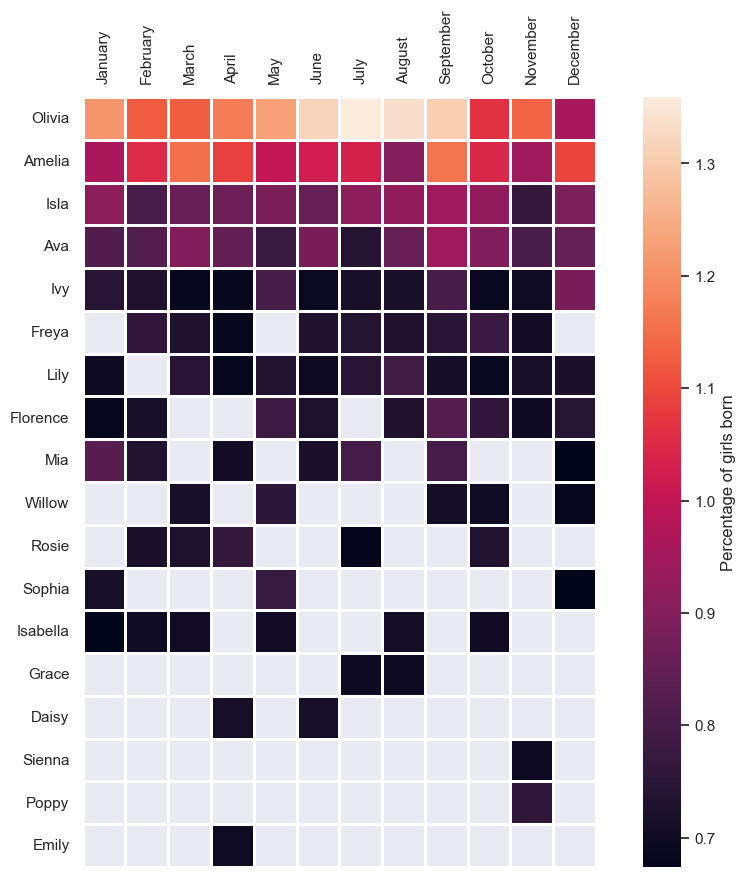

In [4]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.heatmap(matrix, linewidths=1, cbar_kws={'label': 'Percentage of girls born'}, square=True)

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90)
ax.tick_params(left=False, top=False)
ax.grid(False)

plt.show()

In [7]:
import plotly.express as px

fig = px.bar_polar(girls_data, r="Percentage", theta="Month",
                   color="Name")
fig.show()